# <center> Manipulation du csv </center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("56.csv")
df.head(2)

,Auteur,Titre,Edition,Date,ISBN
0,Pierre Vidal-Naquet,Le choix de l'histoire - pourquoi et comment j...,Arléa,2007,9782869597624
1,Ian Kershaw,Choix fatidiques - dix décisions qui ont chang...,Seuil,2012,9782757829707


In [73]:
# # Sauvegarde du csv 
# df.to_csv("bibliographie.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Auteur   415923 non-null  object
 1   Titre    416648 non-null  object
 2   Edition  416648 non-null  object
 3   Date     416648 non-null  int64 
 4   ISBN     416648 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 15.9+ MB


In [75]:
df.describe()

,Date,ISBN
count,118136.000000,1.181360e+05
mean,1999.226375,9.782592e+12
std,10.820716,8.467288e+08
min,1885.000000,9.780002e+12
25%,1997.000000,9.782207e+12
50%,2002.000000,9.782729e+12
75%,2006.000000,9.782848e+12
max,2022.000000,9.791093e+12


---

## Changer l'index pour trier par auteur

In [10]:
df_auteur = df.set_index("Auteur(s)")
df_auteur.loc["Jean-Gabriel Ganascia"]

,Titre,Edition,Date,ISBN
Auteur(s),,,,
Jean-Gabriel Ganascia,Le mythe de la singularité - Faut-il craindre ...,NaN,2017,9782021309997
Jean-Gabriel Ganascia,L'intelligence artificielle,Editions Le Cavalier Bleu,2007,9782846701655


In [11]:
df_auteur.loc["Pierre Vidal-Naquet"]

Titre      Le choix de l'histoire - pourquoi et comment j...
Edition                                                  NaN
Date                                                    2007
ISBN                                           9782869597624
Name: Pierre Vidal-Naquet, dtype: object

## Mettre l'ISBN en index

In [17]:
df_ISBN = df.set_index("ISBN")
df_ISBN.head(2)

,Auteur(s),Titre,Edition,Date
ISBN,,,,
9782869597624,Pierre Vidal-Naquet,Le choix de l'histoire - pourquoi et comment j...,NaN,2007
9782757829707,Ian Kershaw,Choix fatidiques - dix décisions qui ont chang...,Points,2012


---

## Modifications du contenu

In [194]:
# df.loc[22, "Edition"] = "ENI"
# df

In [136]:
# # Sauvegarde du csv 
# df.to_csv("biblio_ultime.csv", index=False)

In [99]:
# supprimer une colonne définitivement
# del df["Unnamed: 0"]

---

## <center> Filtres </center>

## Filtre pour l'auteur 

In [9]:
df[df['Auteur'] == 'Jean-Gabriel Ganascia']

,Auteur,Titre,Edition,Date,ISBN
15,Jean-Gabriel Ganascia,L'intelligence artificielle,Cavalier Bleu,2007,9782846701655
194,Jean-Gabriel Ganascia,L'intelligence artificielle: un exposé pour c...,Flammarion,1993,9782080351418
196,Jean-Gabriel Ganascia,L'âme-machine: les enjeux de l'intelligence a...,Seuil,1990,9782020114707
21979,Jean-Gabriel Ganascia,Les sciences cognitives - Poche,du Pommier,2006,9782746503021
22305,Jean-Gabriel Ganascia,Sciences cognitives (Les),Flammarion,1998,9782080354181


## Filtre pour la date

In [11]:
# df[df["Date"] == 1942]

## Filtre pour la maison d'édition

In [10]:
df[df["Edition"] == "Odile Jacob"].head(2)

,Auteur,Titre,Edition,Date,ISBN
4,Pascal Picq,Il était une fois la paléoanthropologie - Quel...,Odile Jacob,2010,9782738124944
5,Pascal Picq,Lucy et l’obscurantisme,Odile Jacob,2007,9782738117830


## Filtre avec 2 données

In [11]:
# Les années 2010 et 2012
df[df["Date"].isin((2010, 2012))].head(2)

,Auteur,Titre,Edition,Date,ISBN
1,Ian Kershaw,Choix fatidiques - dix décisions qui ont chang...,Seuil,2012,9782757829707
2,Jean-Claude Barreau,"Sans la nation, le chaos",du Toucan,2012,9782810004676


In [537]:
# Deux maisons d'éditions différentes
df[df['Edition'].isin(('Odile Jacob', 'Grasset'))].head(2)

,Auteur(s),Titre,Edition,Date,ISBN
4,Pascal Picq,Il était une fois la paléoanthropologie - Quel...,Odile Jacob,2010,9782738124944
5,Pascal Picq,Lucy et l’obscurantisme,Odile Jacob,2007,9782738117830


## Affichage groupé

In [538]:
# df.groupby("Edition").sum()

In [540]:
# df.groupby("Date").sum()

---

## Statistiques sur les données 

### Moyenne sur les maisons d'édition

In [215]:
# df.groupby("Edition").mean()

### Moyenne de l'année

In [12]:
round(df.Date.mean(), 2)

1999.29

#### Médiane de l'année

In [13]:
df.Date.median()

2002.0

#### Dates extrêmes 

In [14]:
# Minimum
date_min = df.Date.min()
print("Date min :", date_min)

# Maximum

date_max = df.Date.max()
print("Date max :", date_max)

Date min : 1885
Date max : 2025


In [16]:
# # filtre pour récupérer les dates aberrantes 
# filtre = df[df['Date'] > 2022]
# filtre

In [17]:
## Changer la date d'une ligne
# df.loc[64394, 'Date']= 1924
# df.to_csv("37.csv", index=False)

### Récupérer les auteurs 

In [20]:
# df['Auteur'].unique()

### Nombre d'auteurs 

In [19]:
df['Auteur'].nunique()

250293

### Nombre de maisons d'édition différentes 

In [21]:
df['Edition'].nunique()

44739

In [84]:
# # Liste complète, il peut y avoir des NaN
# df['Edition'].unique()

## Nombre de livres selon les maisons d'édition

In [22]:
df["Edition"].value_counts()

Harmattan                                          16672
Gallimard                                          14783
Seuil                                               7388
PUF                                                 7289
Flammarion                                          5927
                                                   ...  
Cerf Volant GF                                         1
Traduit par Emmanuel Hocquard, Christine Michel        1
Traduit par Philippe Gerval                            1
Postface de Luc Vidal                                  1
Illustrations de Lefred Thouron                        1
Name: Edition, Length: 44739, dtype: int64

In [86]:
# Version normalisée (valeur comprise en 0 et 1)
# df["Edition"].value_counts(normalize=True)

---

## <center> Visualisation </center>

## Nombre de livres par maison d'édition

In [87]:
# df["Edition"].value_counts().plot.bar()

<AxesSubplot:xlabel='Edition'>

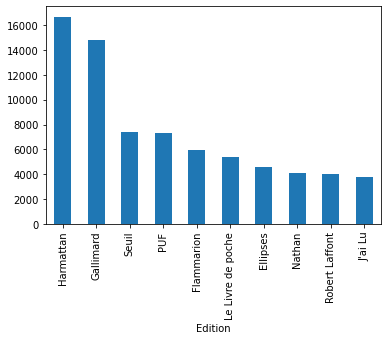

In [23]:
# Classement des 10 premières maison d'édition
top_10 = df.value_counts("Edition", ascending = False).head(10)
top_10.plot.bar()

In [24]:
# Moyenne de livre par maison d'édition 
moyenne = df.value_counts("Edition").mean()
moyenne

9.312859026799885

In [90]:
# Camembert avec l'ensemble des maisons d'édition (trop lourd, pas lisible)
# df["Edition"].value_counts(normalize=False).plot.pie(legend=False, figsize=(7, 7))

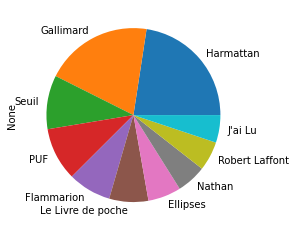

In [25]:
# 10 maisons d'éditions dans la bdd
top_edition = df.value_counts("Edition", ascending = False).head(10).plot.pie(legend=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x21a4d9c5310>,
 'caps': [<matplotlib.lines.Line2D at 0x21a4d9c58b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a4d9c5040>],
 'medians': [<matplotlib.lines.Line2D at 0x21a4d9c5e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a4d9d3160>],
 'means': []}

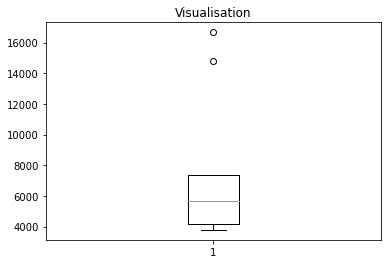

In [26]:
# Diagramme sur 10 maisons d'édition 

nb_livre_par_maison = df.value_counts("Edition").head(10)

fig1, ax1 = plt.subplots()
ax1.set_title('Visualisation')
ax1.boxplot(nb_livre_par_maison)

## Nombre de livres par auteur

<AxesSubplot:xlabel='Auteur'>

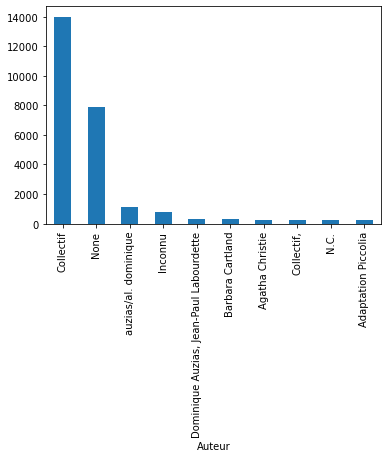

In [28]:
# Top 10 des auteurs

top_10_auteurs = df.value_counts("Auteur", ascending = False).head(10)
top_10_auteurs.plot.bar()

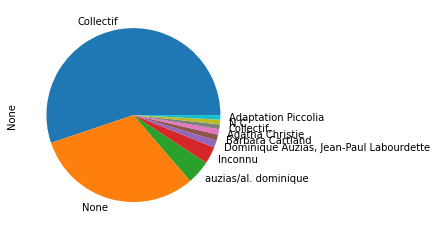

In [31]:
# Ensemble de tous les auteurs (illisible)
# df["Auteur(s)"].value_counts(normalize=False).plot.pie(legend=False, figsize=(7, 7))

# top 10 des auteurs
top_auteurs = df.value_counts("Auteur", ascending = False).head(10).plot.pie(legend=False)

# Nombre de livres par date

<AxesSubplot:xlabel='Date'>

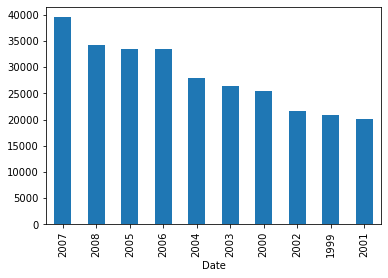

In [32]:
# Top 10 des dates

top_10_date = df.value_counts("Date", ascending = False).head(10)
top_10_date.plot.bar()

<AxesSubplot:ylabel='Date'>

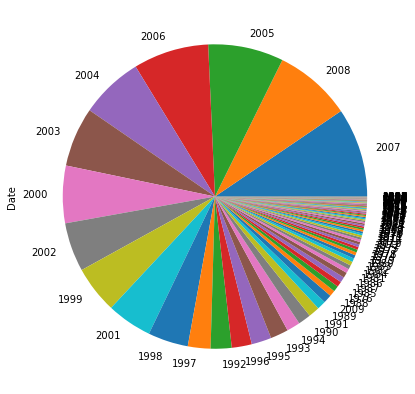

In [33]:
df["Date"].value_counts(normalize=False).plot.pie(legend=False, figsize=(7, 7))

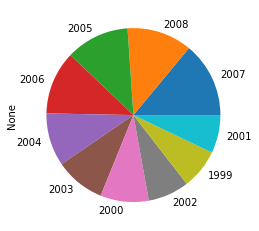

In [34]:
# Top 10 des dates 
top_date = df.value_counts("Date", ascending = False).head(10).plot.pie(legend=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x21a4f086340>,
 'caps': [<matplotlib.lines.Line2D at 0x21a4f093be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a4f093490>],
 'medians': [<matplotlib.lines.Line2D at 0x21a4f0a11c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a4f0a1490>],
 'means': []}

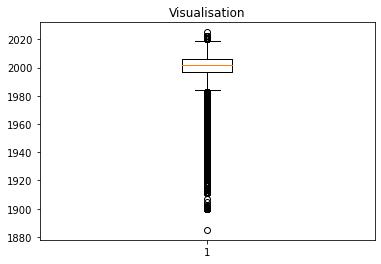

In [35]:
# Diagramme sur la colonne DATE

fig1, ax1 = plt.subplots()
ax1.set_title('Visualisation')
ax1.boxplot(df["Date"])

---

# <center>Modification du csv</center>

---

## Remplace les caractères spéciaux dans la colonne 'Date'

In [133]:
# Il y a des données manquantes dans les dates, il faut les remplacer par O
df['Date'] = df['Date'].fillna(0)

In [57]:
# Suppression d'un caractère spécial
df['Date'] = df['Date'].str.replace('©','')

## Transformer la colonne en int

In [601]:
# vérification du type
df['Date'].dtypes

dtype('int64')

In [527]:
# transformer en int 
df['Date'] = df['Date'].astype(int)

In [141]:
# Vérification des valeurs nulles 
df[df['Date'].isnull()]

# # S'il y a des valeurs nulles faire :
df['Date'] = df['Date'].fillna(0)

In [627]:
filtre = df[df['Date'] == 0  ]
filtre

,Auteur(s),Titre,Edition,Date,ISBN


In [526]:
# remplacer avec l'index
df.loc[1271, "Edition"] = "Documentation Française (La)"

# Sauvegarde du csv 
df.to_csv("bdd.csv", index=False)

In [630]:
# replace
df['Edition'] = df['Edition'].str.replace('Presses universitaires de France','PUF')

# Sauvegarde du csv 
df.to_csv("bdd.csv", index=False)

### Remplacer les 0 dans 'Date' par la date véritable 

In [597]:
# Filtre pour repérer les '0'
filtre = df[df['Date'] == 0  ]
filtre

,Auteur(s),Titre,Edition,Date,ISBN
1296,Besse,L'zillettrismey En Questions,Presses Universitaires de Lyon,0,9782729704315


In [599]:
# remplacer avec l'index
df.loc[1296, "Auteur(s)"] = "Jean-Marie Besse"

# Sauvegarde du csv 
df.to_csv("bdd.csv", index=False)

In [640]:
filtre = df[df["Auteur(s)"] == "Yves Coppens"]
filtre

,Auteur(s),Titre,Edition,Date,ISBN
218,Yves Coppens,Pré-ambules - les premiers pas de l'homme,Odile Jacob,2001,9782738109361


In [649]:
df.head(270)

,Auteur(s),Titre,Edition,Date,ISBN
0,Pierre Vidal-Naquet,Le choix de l'histoire - pourquoi et comment j...,Arléa,2007,9782869597624
1,Ian Kershaw,Choix fatidiques - dix décisions qui ont chang...,Seuil,2012,9782757829707
2,Jean-Claude Barreau,"Sans la nation, le chaos",Editions du Toucan,2012,9782810004676
3,François Bousquet,La Droite buissonnière,Rocher,2017,9782268089898
4,Pascal Picq,Il était une fois la paléoanthropologie - Quel...,Odile Jacob,2010,9782738124944
...,...,...,...,...,...
265,Jean-Philippe Couturier,Lorsque mon patron sera une intelligence artif...,VA,2019,9782360930128
266,Luc Julia,L'intelligence artificielle n'existe pas,First,2019,9782412043400
267,Jean-Philippe Desbiolles,L'IA sera ce que tu en feras: les 10 règles d...,Dunod,2019,9782100800438
268,Daniel Crevier,A la recherche de l'intelligence artificielle,Flammarion,1997,9782080814289


---

## Changer le nom d'éditeur "."

Objectifs :
- Récupérer chaque index dans une liste
- Remplacer par "None" dans une boucle

In [50]:
import pandas as pd
df = pd.read_csv('test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  6144 non-null   object
 1   Titre      6146 non-null   object
 2   Edition    6146 non-null   object
 3   Date       6146 non-null   int64 
 4   ISBN       6146 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 240.2+ KB


In [54]:
# filtre auteur == "."
filtre_point = df[df['Auteur(s)']== "."]
filtre_point

,Auteur(s),Titre,Edition,Date,ISBN


In [52]:
# création d'une liste pour les index
liste_index = []
for index, row in filtre_point.iterrows(): 
    liste_index.append(index)
    
print("Nombre d'index dans la liste :", len(liste_index))

Nombre d'index dans la liste : 19


In [53]:
# Remplacement par None
from tqdm import tqdm

for x in tqdm(liste_index) :
    df.loc[x, 'Auteur(s)']= "None"
    df.to_csv("test.csv", index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 28.00it/s]


---

# Remplacer les "None" par les noms des auteurs

In [55]:
import pandas as pd
df = pd.read_csv("test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  6144 non-null   object
 1   Titre      6146 non-null   object
 2   Edition    6146 non-null   object
 3   Date       6146 non-null   int64 
 4   ISBN       6146 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 240.2+ KB


In [56]:
# afficher les None 
filtre = df[df['Auteur(s)']=="None"]
filtre

,Auteur(s),Titre,Edition,Date,ISBN
2,None,La danse d'amour du vieux corbeau,Denoël,1983,9782207228180
10,None,Le pornographe timide,"Traduit par Marc de Gouvenain, Lena Grumbach",2000,9782742726400
11,None,**Yvelines**,Ponchet Plan Net éditions,2000,9782846670760
34,None,Costa Brava/Andorre/Perpignan - 1/200.000,Marco Polo,2000,9783895252310
38,None,New Appartment design /multilingue,Daab,2005,9783937718170
...,...,...,...,...,...
6095,None,Abécédaire de l'Apocalypse [Board book] Parnov...,Traduit par Bernard Kreise,2008,9782355860010
6096,None,Un pont sur la Loire,Table Ronde,2006,9782710328490
6100,None,Villa Argane,Presses du Midi,2001,9782878673050
6122,None,Sept jours pour expier,Traduit par Jean Bonnefoy,1993,9782207240960


### Avec ISBNLIB

In [7]:
import pandas as pd
import isbnlib
from isbnlib import canonical, meta
import csv
from tqdm import tqdm

In [24]:
# liste récupérant les ISBN du filtre 'None'
liste_ISBN = [x for x in filtre['ISBN']]

len(liste_ISBN)

1249

## Correction des 'None' (suite)

In [57]:
from isbnlib import canonical, meta
import csv
from tqdm.notebook import tqdm_notebook

erreur = 0

# MODIFICATION DE LA SOURCE
SERVICE = 'goob'

for index, row in tqdm_notebook(filtre.iterrows()):
    isbn = str(row[4])
    try : 
        data = meta(isbn, SERVICE)

        try :
            if len(data["Authors"]) == 1 :
                            for x in data["Authors"] :

                                filtre.loc[index, "Auteur(s)"] = str(x)
                                filtre.to_csv("copie_noms.csv", index=False)
            else : 
                filtre.loc[index, "Auteur(s)"] = data["Authors"]

        except :
            erreur += 1
            continue
    
    except :
        erreur += 1
        continue


print("Nb d'erreurs :", erreur)

# Sauvegarde
filtre.to_csv("filtre.csv", index=False)

0it [00:00, ?it/s]

Nb d'erreurs : 120


## Suppression des lignes 

**Objectif :** maintenant que nous avons retravaillé les 'None', on peut récupérer les index des lignes grâce au précédent filtre. Une fois les index ajoutés à une liste, on peut les supprimer dans le df. Il ne nous reste plus qu'à concaténer le df avec le nouveau .csv (sans les 'None')

In [58]:
# Premier filtre 
# filtre = df[df['Auteur(s)']=="None"]

# création d'une liste pour les index
liste_index = []
for index, row in filtre.iterrows(): 
    liste_index.append(index)
    
print("Nombre d'index dans la liste :", len(liste_index))

Nombre d'index dans la liste : 496


In [59]:
print(liste_index)

[2, 10, 11, 34, 38, 42, 48, 50, 53, 61, 73, 76, 84, 93, 98, 111, 112, 121, 151, 191, 204, 219, 225, 230, 238, 247, 253, 259, 270, 278, 301, 317, 319, 324, 343, 358, 374, 407, 415, 438, 449, 450, 471, 491, 494, 502, 553, 556, 587, 616, 632, 635, 638, 647, 653, 660, 664, 690, 691, 712, 721, 744, 747, 769, 778, 779, 789, 802, 813, 848, 849, 880, 909, 922, 931, 942, 946, 951, 956, 957, 977, 979, 984, 994, 1004, 1005, 1019, 1035, 1038, 1057, 1071, 1078, 1101, 1140, 1159, 1165, 1166, 1187, 1188, 1196, 1198, 1199, 1208, 1214, 1227, 1230, 1243, 1245, 1254, 1262, 1277, 1280, 1287, 1306, 1319, 1378, 1419, 1449, 1461, 1474, 1481, 1488, 1511, 1524, 1544, 1570, 1586, 1589, 1603, 1612, 1628, 1635, 1639, 1655, 1660, 1695, 1700, 1704, 1746, 1755, 1776, 1789, 1790, 1814, 1817, 1834, 1854, 1867, 1903, 1908, 1935, 1970, 1971, 1998, 2006, 2008, 2009, 2058, 2074, 2077, 2079, 2104, 2126, 2131, 2138, 2159, 2161, 2165, 2166, 2175, 2179, 2183, 2184, 2228, 2237, 2243, 2261, 2264, 2265, 2277, 2295, 2301, 2303, 2

In [60]:
df = pd.read_csv('test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  6144 non-null   object
 1   Titre      6146 non-null   object
 2   Edition    6146 non-null   object
 3   Date       6146 non-null   int64 
 4   ISBN       6146 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 240.2+ KB


In [62]:
# Suppression des lignes
df.drop([2, 10, 11, 34, 38, 42, 48, 50, 53, 61, 73, 76, 84, 93, 98, 111, 112, 121, 151, 191, 204, 219, 225, 230, 238, 247, 253, 259, 270, 278, 301, 317, 319, 324, 343, 358, 374, 407, 415, 438, 449, 450, 471, 491, 494, 502, 553, 556, 587, 616, 632, 635, 638, 647, 653, 660, 664, 690, 691, 712, 721, 744, 747, 769, 778, 779, 789, 802, 813, 848, 849, 880, 909, 922, 931, 942, 946, 951, 956, 957, 977, 979, 984, 994, 1004, 1005, 1019, 1035, 1038, 1057, 1071, 1078, 1101, 1140, 1159, 1165, 1166, 1187, 1188, 1196, 1198, 1199, 1208, 1214, 1227, 1230, 1243, 1245, 1254, 1262, 1277, 1280, 1287, 1306, 1319, 1378, 1419, 1449, 1461, 1474, 1481, 1488, 1511, 1524, 1544, 1570, 1586, 1589, 1603, 1612, 1628, 1635, 1639, 1655, 1660, 1695, 1700, 1704, 1746, 1755, 1776, 1789, 1790, 1814, 1817, 1834, 1854, 1867, 1903, 1908, 1935, 1970, 1971, 1998, 2006, 2008, 2009, 2058, 2074, 2077, 2079, 2104, 2126, 2131, 2138, 2159, 2161, 2165, 2166, 2175, 2179, 2183, 2184, 2228, 2237, 2243, 2261, 2264, 2265, 2277, 2295, 2301, 2303, 2319, 2332, 2338, 2351, 2356, 2359, 2377, 2381, 2382, 2389, 2404, 2431, 2438, 2458, 2466, 2468, 2480, 2490, 2492, 2495, 2504, 2512, 2514, 2520, 2521, 2569, 2585, 2600, 2604, 2607, 2623, 2637, 2665, 2676, 2680, 2704, 2732, 2751, 2752, 2757, 2773, 2791, 2805, 2843, 2874, 2890, 2893, 2920, 2922, 2945, 2949, 2973, 2979, 2980, 2987, 2990, 2999, 3002, 3009, 3014, 3025, 3034, 3041, 3051, 3052, 3058, 3084, 3095, 3103, 3108, 3115, 3123, 3124, 3127, 3134, 3140, 3142, 3211, 3218, 3232, 3245, 3261, 3270, 3278, 3294, 3303, 3309, 3312, 3316, 3317, 3328, 3338, 3343, 3347, 3358, 3372, 3378, 3383, 3408, 3434, 3440, 3460, 3463, 3480, 3481, 3482, 3493, 3496, 3502, 3510, 3523, 3551, 3557, 3569, 3576, 3585, 3590, 3601, 3609, 3622, 3632, 3642, 3647, 3657, 3709, 3712, 3716, 3721, 3726, 3730, 3742, 3769, 3772, 3779, 3791, 3795, 3804, 3837, 3843, 3844, 3858, 3879, 3893, 3906, 3938, 3941, 3947, 3954, 3991, 3998, 4048, 4058, 4097, 4109, 4110, 4113, 4115, 4119, 4196, 4197, 4204, 4212, 4233, 4249, 4279, 4293, 4295, 4325, 4328, 4336, 4344, 4346, 4352, 4374, 4411, 4444, 4447, 4468, 4501, 4507, 4520, 4526, 4573, 4578, 4584, 4591, 4601, 4603, 4610, 4612, 4614, 4636, 4640, 4653, 4704, 4707, 4727, 4781, 4782, 4783, 4813, 4816, 4844, 4846, 4849, 4865, 4879, 4895, 4899, 4906, 4913, 4926, 4937, 4941, 4951, 4969, 4986, 4987, 4994, 5003, 5023, 5039, 5076, 5085, 5093, 5094, 5113, 5154, 5178, 5185, 5188, 5206, 5244, 5246, 5247, 5302, 5312, 5314, 5324, 5346, 5350, 5372, 5394, 5404, 5409, 5410, 5413, 5421, 5445, 5453, 5496, 5503, 5515, 5530, 5540, 5541, 5542, 5558, 5571, 5578, 5609, 5622, 5658, 5661, 5666, 5668, 5675, 5677, 5738, 5742, 5748, 5754, 5771, 5782, 5784, 5791, 5794, 5796, 5801, 5818, 5825, 5836, 5841, 5846, 5847, 5863, 5883, 5885, 5893, 5895, 5896, 5902, 5905, 5914, 5924, 5952, 5955, 5963, 5966, 5973, 5974, 5980, 5993, 6009, 6016, 6045, 6054, 6076, 6095, 6096, 6100, 6122, 6141], axis=0, inplace=True)
df.info()
# Sauvegarde
df.to_csv("test.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5650 entries, 0 to 6145
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Auteur(s)  5648 non-null   object
 1   Titre      5650 non-null   object
 2   Edition    5650 non-null   object
 3   Date       5650 non-null   int64 
 4   ISBN       5650 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 264.8+ KB


In [69]:
# Concaténation des 2 df
df = pd.concat(
    map(pd.read_csv, ['40.csv', 'test_2.csv']), ignore_index=True)

# Sauvegarde
df.to_csv("41.csv", index=False)

In [71]:
df = pd.read_csv('40.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111990 entries, 0 to 111989
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Auteur(s)  111410 non-null  object
 1   Titre      111990 non-null  object
 2   Edition    111812 non-null  object
 3   Date       111990 non-null  int64 
 4   ISBN       111990 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ MB


In [67]:
df[df['Auteur(s)']== "None"]

,Auteur(s),Titre,Edition,Date,ISBN
2,None,La danse d'amour du vieux corbeau,Denoël,1983,9782207228180
10,None,Le pornographe timide,"Traduit par Marc de Gouvenain, Lena Grumbach",2000,9782742726400
11,None,**Yvelines**,Ponchet Plan Net éditions,2000,9782846670760
34,None,Costa Brava/Andorre/Perpignan - 1/200.000,Marco Polo,2000,9783895252310
38,None,New Appartment design /multilingue,Daab,2005,9783937718170
...,...,...,...,...,...
12282,None,La ligne de feu,"Traduit par Jacques Fontaine, Ivan Steenhout",2000,9782842612160
12285,None,"Les Amis de Milosz, numéro 27",Rocher,1998,9782850552250
12288,None,Nouveau paradis,Seuil Jeunesse,1937,9782020033510
12295,None,Sept jours pour expier,Traduit par Jean Bonnefoy,1993,9782207240960
